In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy as np

In [14]:
#Loading Dataset
df=pd.read_csv("bank-full.csv",sep=';')
#printing the head of the Dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [0]:
#Creating Dummy Variables

df['y'] = df['y'].map({'yes': 1, 'no': 0})
df['default']=df['default'].map({'yes': 1, 'no': 0})
df['housing']=df['housing'].map({'yes': 1, 'no': 0})
df['loan']=df['loan'].map({'yes': 1, 'no': 0})
df_marital = pd.get_dummies(df['marital'])
df['married'] = df_marital['married']
df['divorced'] = df_marital['divorced']
df_education = pd.get_dummies(df['education'])
df['tertiary'] = df_education['tertiary']
df['secondary'] = df_education['secondary']

In [0]:
cols = ['age', 'default', 'balance', 'housing',
       'loan','duration', 'campaign', 'pdays',
       'previous', 'y', 'married', 'divorced','tertiary',
       'secondary']
df = df[cols]

In [0]:
#Splitting x and y
y=df['y'].values
X=df.drop(['y'], axis=1).values
#X=df[['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',]].values
#Test Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=100)

In [0]:
def featureNormalize(X):
    X_norm = X
    mu    = np.zeros((1, X.shape[1]))
    sigma = np.zeros((1, X.shape[1]))
    for i in range(X.shape[1]):
      mu[:,i] = np.mean(X[:,i])
      sigma[:,i] = np.std(X[:,i])
      X_norm[:,i] = (X[:,i] - float(mu[:,i]))/float(sigma[:,i])
    return X_norm, mu, sigma

In [0]:
X_norm, mu, sigma = featureNormalize(X_train)
X_train = X_norm
X_test = (X_test - mu)/sigma

In [0]:
k_range = range(1,26)
scores_train=[]
scores_test=[]
scores_list =[]

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred_train = knn.predict(X_train)
  scores_train.append(metrics.accuracy_score(y_train,y_pred_train))
  y_pred_test = knn.predict(X_test)
  scores_test.append(metrics.accuracy_score(y_test,y_pred_test))

In [0]:
df1 = pd.DataFrame(
    {'K-Neighbor': k_range,
     'Acc': 'Training Accuracy',
     'Accuracy': scores_train
    })
df2 = pd.DataFrame(
    {'K-Neighbor': k_range,
     'Acc': 'Testing Accuracy',
     'Accuracy': scores_test
    })

df_knn = pd.concat([df1, df2],sort=False)
df_knn['Accuracy'] = (df_knn['Accuracy'] * 100).round(2)

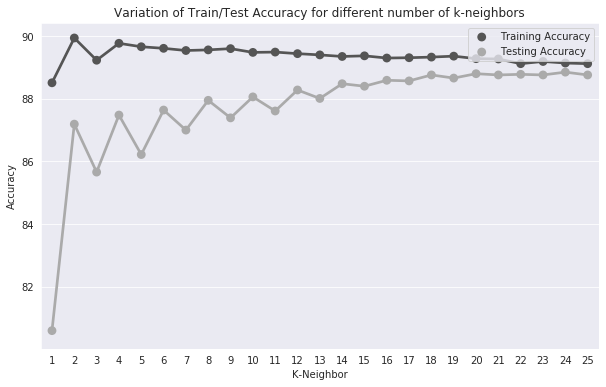

In [22]:
sns.set_style("darkgrid",
              {
                  'axes.grid' : True
              })
plt.figure(figsize=(10,6))
ax = sns.pointplot(x="K-Neighbor", y="Accuracy", hue="Acc",palette="gist_gray", data=df_knn)
plt.legend(loc='upper right')
ax.set_title('Variation of Train/Test Accuracy for different number of k-neighbors')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.2f}'.format(p.get_height()), 
        fontsize=12, color='black', ha='center', va='bottom')
plt.savefig("output_knn.png",dpi=150)

In [0]:
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#Cross Validations
cvs = range(2,31)
accuracy = []
for cv in cvs:
  cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=cv)
  accuracy.append(np.mean(cv_scores))

In [0]:
df_knn_cv = pd.DataFrame(
    {'K-Fold': cvs,
     'Accuracy': accuracy
    })

df_knn_cv['Accuracy'] = (df_knn_cv['Accuracy'] * 100).round(2)

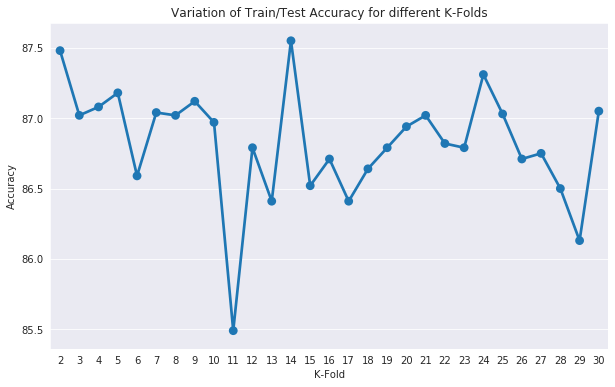

In [29]:
sns.set_style("darkgrid",
              {
                  'axes.grid' : True
              })
plt.figure(figsize=(10,6))
ax = sns.pointplot(x="K-Fold", y="Accuracy",data=df_knn_cv)
ax.set_title('Variation of Train/Test Accuracy for different K-Folds')

plt.savefig("output_knn_cv.png",dpi=150)

In [32]:
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
k_range = range(1,31)
param_grid = dict(n_neighbors=k_range)
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=10, scoring='accuracy')
#fit model to data
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None, param_grid={'n_neighbors': range(1, 31)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [36]:
# examine the best model
print("Cross Validated K-Nearest Neighbour")
print('Accuracy:',str((knn_gscv.best_score_*100).round(2)) + '%')
print('Number of k-Nearest Neighbor:',knn_gscv.best_params_)

Cross Validated K-Nearest Neighbour
Accuracy: 88.75%
Number of k-Nearest Neighbor: {'n_neighbors': 16}


In [34]:
#create new a knn model
knn3 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
k_range = range(1,31)
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range,weights=weight_options)
#use gridsearch to test all values for n_neighbors
knn_gscv2 = GridSearchCV(knn3, param_grid, cv=10, scoring='accuracy')
#fit model to data
knn_gscv2.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [37]:
# examine the best model
print("Cross Validated K-Nearest Neighbour and Distance")
print('Accuracy:',str((knn_gscv2.best_score_*100).round(2)) + '%')
print('Number of k-Nearest Neighbor:',knn_gscv2.best_params_)

Cross Validated K-Nearest Neighbour and Distance
Accuracy: 88.75%
Number of k-Nearest Neighbor: {'n_neighbors': 16, 'weights': 'uniform'}
